In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt
import  nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from fuzzywuzzy import fuzz
import xgboost
from gensim.models.ldamodel import LdaModel
from gensim import corpora
import gc

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
gc.collect()

In [6]:
pd.set_option('display.max_colwidth', -1)
trainFile = pd.read_csv(os.getcwd()+"\\train.csv")

In [7]:
trainFile= trainFile[trainFile['question1'].map(str).apply(len)>8]

In [8]:
trainFile =trainFile[trainFile['question2'].map(str).apply(len)>=10]

In [121]:
trainFile.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed,...,ratio,DiffLength,DifferentWordsStopped,is_again,is_differ,is_without,is_between,is_percentage,is_dollar,is_name
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]","[step, step, guid, invest, share, market, india, ?]","[step, step, guid, invest, share, market, ?]",...,93,9,[india],0,0,0,0,0,0,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]","[stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]","[would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]",...,65,37,"[happen, stori, would, govern, stole, back, indian]",0,0,0,0,0,0,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[how, can, i, increase, the, speed, of, my, internet, connection, while, using, a, vpn, ?]","[how, can, internet, speed, be, increased, by, hacking, through, dns, ?]","[increas, speed, internet, connect, use, vpn, ?]","[internet, speed, increas, hack, dn, ?]",...,45,14,"[vpn, hack, use, connect, dn]",0,0,0,0,0,0,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[why, am, i, mentally, very, lonely, ?, how, can, i, solve, it, ?]","[find, the, remainder, when, [, math, ], 23, ^{, 24, }[/, math, ], is, divided, by, 24, ,, 23, ?]","[mental, lone, ?, solv, ?]","[find, remaind, [, math, ], 23, ^{, 24, }[/, math, ], divid, 24, ,, 23, ?]",...,7,15,"[lone, divid, mental, 24, math, ^{, ], [, remaind, solv, ,, }[/, 23, find]",0,0,0,0,0,0,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[which, one, dissolve, in, water, quikly, sugar, ,, salt, ,, methane, and, carbon, di, oxide, ?]","[which, fish, would, survive, in, salt, water, ?]","[one, dissolv, water, quikli, sugar, ,, salt, ,, methan, carbon, oxid, ?]","[fish, would, surviv, salt, water, ?]",...,37,37,"[would, oxid, carbon, surviv, fish, one, quikli, methan, dissolv, ,, sugar]",0,0,0,0,0,0,0


In [11]:

#text = nltk.Text([p_stemmer.stem(i).lower() for i in words if i not in stopwords.words()  ])

#lowercase_words = [word.lower() for word in words
#                  if word not in stopwords.words() and word.isalpha()]

tempDF= trainFile['question1'].apply(lambda x: str(x).lower())
trainFile['Q1Words']= tempDF.apply(WordPunctTokenizer().tokenize)

tempDF= trainFile['question2'].apply(lambda x: str(x).lower())
trainFile['Q2Words']= tempDF.apply(WordPunctTokenizer().tokenize)

In [13]:
def intersection(a,b):
    exclude = set(b)
    sameWords = [x for x in set(a) if x in b]
    return sameWords
    
def union(a,b):
    AllWords= list(set(a)|set(b))
    return AllWords

def differ(a,b):
    exclude = set(b)
    different = [x for x in set(a) if x not in b]
    return different
    

In [14]:



p_stemmer = PorterStemmer()
NotToRemove = ['again','against','before','same','between','further']
stops= differ(stopwords.words(),NotToRemove)
print(stops)
trainFile['Q1WordsStemmed'] = trainFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q1Words'] if i not in stops ],axis=1 )

['disebutkannya', 'and', 'eravate', 'жаракімалла', 'trei', 'біздермен', 'berapapun', 'sonst', 'لستن', 'cum', 'naik', 'әй', 'stavo', 'तीन', 'sepihak', 'y', 'diperbuatnya', 'werden', 'борт', 'zum', 'puţină', 'varför', 'kalian', 'with', 'sesaat', 'әрқалай', 'πως', 'tetapi', 'σὸς', 'olmuşdur', 'seperlunya', 'diingatkan', 'su', 'med', 'जसको', 'ليسا', 'tinha', 'hinter', 'nada', 'inginkah', 'isə', 'perlunya', 'seine', 'namun', 'ceva', 'менің', 'لسن', 'dello', 'қолп', 'todos', 'újabb', 'سوف', 'bukankah', 's', 'estás', 'itself', 'only', 'deg', 'esteja', 'căci', 'semakin', 'om', 'derselben', 'dirinya', 'memperlihatkan', 'पर्याप्त', 'надо', 'nem', 'tenéis', 'sinua', 'semisalnya', 'acelea', 'tuvieron', 'sådant', 'sentidos', 'kalaulah', 'ero', 'avesti', 'بكم', 'che', 'av', 'təəssüf', 'беу', 'теперь', 'tutur', 'kamulah', 'бүйт', 'тогда', 'батыр-бұтыр', 'mı', 'mikä', 'boleh', 'los', 'olehnya', 'ne', 'sin', 'fussiez', 'ist', 'berawal', 'पक्कै', 'ik', 'inn', 'осынау', 'ayons', 'ذواتا', 'staranno', 'toa

In [15]:
trainFile['Q2WordsStemmed'] = trainFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q2Words'] if i not in stops ],axis=1 )

In [16]:
trainFile.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]","[step, step, guid, invest, share, market, india, ?]","[step, step, guid, invest, share, market, ?]"
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]","[stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]","[would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]"


In [28]:

trainFile['SameWords'] = trainFile.apply(lambda row:intersection(row['Q1Words'],row['Q2Words']) , axis=1)


In [29]:
trainFile['DifferentWords'] = trainFile.apply(lambda row:differ(union(row['Q1Words'],row['Q2Words']),intersection(row['Q1Words'],row['Q2Words'])) , axis=1)
trainFile['DifferentWordsStopped'] = trainFile.apply(lambda row:differ(union(row['Q1WordsStemmed'],row['Q2WordsStemmed']),intersection(row['Q1WordsStemmed'],row['Q2WordsStemmed'])) , axis=1)

In [30]:
trainFile['cosineSimiliarity'] = trainFile.apply(lambda row:len(row['SameWords'])/(len(union(row['Q1Words'],row['Q2Words']))) ,axis=1)

In [31]:
trainFile[trainFile['DifferentWords'].map(str).apply(len) < 5 ]

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed,SameWords,DifferentWords,cosineSimiliarity,POS,PartOfSpeech,NoOfNouns,tk_set_ratio,ratio,DiffLength,DifferentWordsStopped
209,209,419,420,Why is creativity important?,Why creativity is important?,1,"[why, is, creativity, important, ?]","[why, creativity, is, important, ?]","[creativ, import, ?]","[creativ, import, ?]","[creativity, ?, is, important, why]",[],1.0,[],[],0,100,89,0,[]
585,585,1168,1169,Can you play Asian Playstation 4 games on a European Playstation?,Can you play Asian Playstation 4 games on a European Playstation 4?,0,"[can, you, play, asian, playstation, 4, games, on, a, european, playstation, ?]","[can, you, play, asian, playstation, 4, games, on, a, european, playstation, 4, ?]","[play, asian, playstat, 4, game, european, playstat, ?]","[play, asian, playstat, 4, game, european, playstat, 4, ?]","[play, games, ?, on, asian, european, a, 4, you, playstation, can]",[],1.0,[],[],0,100,98,2,[]
1209,1209,2410,2411,What are the minimum GPA and GRE requirements of Florida State University?,What are the minimum GPA and GRE requirements of Florida State University?,1,"[what, are, the, minimum, gpa, and, gre, requirements, of, florida, state, university, ?]","[what, are, the, minimum, gpa, and, gre, requirements, of, florida, state, university, ?]","[minimum, gpa, gre, requir, florida, state, univers, ?]","[minimum, gpa, gre, requir, florida, state, univers, ?]","[and, requirements, gre, ?, minimum, university, what, of, gpa, the, are, florida, state]",[],1.0,[],[],0,100,99,1,[]
1657,1657,3299,3300,How much bigger can a male bicep muscles get than a female's?,How much bigger can a male's bicep muscles get than a female's?,1,"[how, much, bigger, can, a, male, bicep, muscles, get, than, a, female, ', s, ?]","[how, much, bigger, can, a, male, ', s, bicep, muscles, get, than, a, female, ', s, ?]","[much, bigger, male, bicep, muscl, get, femal, ', ?]","[much, bigger, male, ', bicep, muscl, get, femal, ', ?]","[', than, muscles, female, s, ?, male, much, a, bigger, can, get, how, bicep]",[],1.0,[],[],0,100,98,2,[]
2344,2344,4661,4662,What is that one decision that changed your life forever?,What is one decision that changed your life forever?,1,"[what, is, that, one, decision, that, changed, your, life, forever, ?]","[what, is, one, decision, that, changed, your, life, forever, ?]","[one, decis, chang, life, forev, ?]","[one, decis, chang, life, forev, ?]","[decision, that, forever, ?, what, your, life, one, is, changed]",[],1.0,[],[],0,100,95,5,[]
2506,2506,4979,4980,How many all time views do you have on your Quora answers (not questions) stats?,How many all time views do you have on your Quora questions (not answers) stats?,1,"[how, many, all, time, views, do, you, have, on, your, quora, answers, (, not, questions, ), stats, ?]","[how, many, all, time, views, do, you, have, on, your, quora, questions, (, not, answers, ), stats, ?]","[mani, time, view, quora, answer, (, question, ), stat, ?]","[mani, time, view, quora, question, (, answer, ), stat, ?]","[time, (, not, all, have, answers, many, views, do, ?, on, quora, your, stats, you, questions, ), how]",[],1.0,[],[],0,100,84,0,[]
2641,2641,5248,5249,How do I know if I am Republican or a Democrat?,How do I know if I am a Democrat or Republican?,1,"[how, do, i, know, if, i, am, republican, or, a, democrat, ?]","[how, do, i, know, if, i, am, a, democrat, or, republican, ?]","[know, republican, democrat, ?]","[know, democrat, republican, ?]","[know, if, or, i, ?, do, republican, a, democrat, am, how]",[],1.0,[],[],0,100,70,0,[]
2848,2848,5650,5651,Should I learn Node.js or Ruby on Rails?,Should I learn Ruby on Rails or Node.js?,1,"[should, i, learn, node, ., js, or, ruby, on, rails, ?]","[should, i, learn, ruby, on, rails, or, node, ., js, ?]","[learn, node, ., js, rubi, rail, ?]","[learn, rubi, rail, node, ., js, ?]","[js, or, i, rails, should, ?, on, node, ., learn, ruby]",[],1.0,[

In [32]:
trainFile['POS'] = trainFile['DifferentWords'].apply(nltk.pos_tag)

In [33]:
#trainFile['PartOfSpeech'] = trainFile['POS'].map('list').apply() if len(z)>1]
trainFile['PartOfSpeech'] = trainFile.apply(lambda x: [y[1] for y in x["POS"]],axis = 1)




In [34]:
def count(lst):
    #print (i)
    #lst = b[a].loc[i]
    
    c=0
    #print(lst)
    if not lst:
        return 0
    #print(lst)
    for j in lst:
        if j in ['NN','NNS','NNP','NNPS']:
            c+=1
    return c        
#count (['VBZ','IN','JJ','NN','NN','NNPS','MS'])        
trainFile['NoOfNouns'] = trainFile.apply(lambda x: count(x['PartOfSpeech']) ,axis = 1)
#trainFile['NoOfNouns'] = trainFile.apply(count('PartOfSpeech' ))

In [35]:
trainFile["tk_set_ratio"] = trainFile.apply(lambda x: fuzz.token_set_ratio(str(x["question1"]),str(x["question2"])),axis = 1)

In [36]:
trainFile["ratio"] = trainFile.apply(lambda x: fuzz.ratio(str(x["question1"]),str(x["question2"])),axis = 1)

In [37]:
trainFile["DiffLength"] = trainFile.apply(lambda x: abs(len(x["question1"])-len(x["question2"])), axis = 1)

In [38]:
trainFile.head(2)


,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed,SameWords,DifferentWords,cosineSimiliarity,POS,PartOfSpeech,NoOfNouns,tk_set_ratio,ratio,DiffLength,DifferentWordsStopped
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]","[step, step, guid, invest, share, market, india, ?]","[step, step, guid, invest, share, market, ?]","[invest, in, market, by, share, ?, to, guide, what, the, is, step]",[india],0.923077,"[(india, NN)]",[NN],1,100,93,9,[india]
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, is, the, story, of, kohinoor, (, koh, -, i, -, noor, ), diamond, ?]","[what, would, happen, if, the, indian, government, stole, the, kohinoor, (, koh, -, i, -, noor, ), diamond, back, ?]","[stori, kohinoor, (, koh, -, -, noor, ), diamond, ?]","[would, happen, indian, govern, stole, kohinoor, (, koh, -, -, noor, ), diamond, back, ?]","[(, diamond, i, ?, ), noor, what, kohinoor, the, koh, -]","[story, if, government, of, indian, happen, would, is, stole, back]",0.523810,"[(story, NN), (if, IN), (government, NN), (of, IN), (indian, JJ), (happen, NN), (would, MD), (is, VBZ), (stole, JJ), (back, RB)]","[NN, IN, NN, IN, JJ, NN, MD, VBZ, JJ, RB]",3,86,65,37,"[happen, stori, would, govern, stole, back, indian]"


In [220]:
trainFile.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'Q1Words', 'Q2Words', 'SameWords', 'cosineSimiliarity'],
      dtype='object')

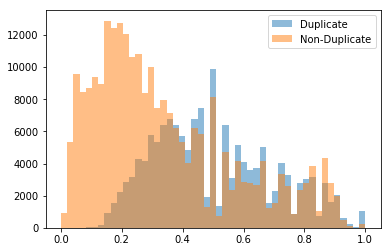

In [18]:
bins = np.linspace(0,1,50)
plt.hist(trainFile[trainFile["is_duplicate"] == 1]["cosineSimiliarity"],bins,alpha = 0.5,label = 'Duplicate')
plt.hist(trainFile[trainFile["is_duplicate"] == 0]["cosineSimiliarity"],bins,alpha = 0.5,label = 'Non-Duplicate')
plt.legend(loc='upper right')
plt.show()

In [65]:
trainFile[(trainFile["is_duplicate"] == 1) & (trainFile["cosineSimiliarity"]<0.2) & (trainFile["NoOfNouns"]>10)]


,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,SameWords,DifferentWords,cosineSimiliarity,POS,PartOfSpeech,NoOfNouns
880,880,1755,1756,Are there any telescopes powerful enough to view evidence left behind from NASA's moon landings?,"Do we have telescopes powerful enough nowadays to see the man-made objects left on the moon by the Apollo missions, proving 100% that humans did in fact land there?",1,"[are, there, any, telescopes, powerful, enough, to, view, evidence, left, behind, from, nasa, ', s, moon, landings, ?]","[do, we, have, telescopes, powerful, enough, nowadays, to, see, the, man, -, made, objects, left, on, the, moon, by, the, apollo, missions, ,, proving, 100, %, that, humans, did, in, fact, land, there, ?]","[there, left, to, moon, enough, ?, powerful, telescopes]","[,, did, on, have, man, -, landings, proving, by, missions, made, nasa, %, nowadays, objects, apollo, land, humans, we, the, s, see, that, ', fact, do, any, from, 100, in, evidence, behind, view, are]",0.190476,"[(,, ,), (did, VBD), (on, IN), (have, VB), (man, NN), (-, :), (landings, NNS), (proving, VBG), (by, IN), (missions, NNS), (made, VBN), (nasa, CD), (%, NN), (nowadays, JJ), (objects, NNS), (apollo, JJ), (land, NN), (humans, NNS), (we, PRP), (the, DT), (s, JJ), (see, NN), (that, IN), (', ''), (fact, NN), (do, VBP), (any, DT), (from, IN), (100, CD), (in, IN), (evidence, NN), (behind, IN), (view, NN), (are, VBP)]","[,, VBD, IN, VB, NN, :, NNS, VBG, IN, NNS, VBN, CD, NN, JJ, NNS, JJ, NN, NNS, PRP, DT, JJ, NN, IN, '', NN, VBP, DT, IN, CD, IN, NN, IN, NN, VBP]",11
110430,110430,24118,14930,What do you think of the Government's move of banning old Rs. 500 & Rs. 1000 notes?,What are your views on banning 500 and 1000 rupee notes? How does it affect black money and is it really gonna work and expose all the black money?,1,"[what, do, you, think, of, the, government, ', s, move, of, banning, old, rs, ., 500, &, rs, ., 1000, notes, ?]","[what, are, your, views, on, banning, 500, and, 1000, rupee, notes, ?, how, does, it, affect, black, money, and, is, it, really, gonna, work, and, expose, all, the, black, money, ?]","[the, what, 500, 1000, ?, banning, notes]","[is, government, on, of, gonna, you, all, think, money, rs, &, old, affect, expose, and, s, ., black, really, ', do, does, your, move, rupee, it, work, views, how, are]",0.189189,"[(is, VBZ), (government, NN), (on, IN), (of, IN), (gonna, NN), (you, PRP), (all, DT), (think, VBP), (money, NN), (rs, NN), (&, CC), (old, JJ), (affect, NN), (expose, NN), (and, CC), (s, NN), (., .), (black, JJ), (really, RB), (', POS), (do, NN), (does, VBZ), (your, PRP$), (move, NN), (rupee, NN), (it, PRP), (work, VBZ), (views, NNS), (how, WRB), (are, VBP)]","[VBZ, NN, IN, IN, NN, PRP, DT, VBP, NN, NN, CC, JJ, NN, NN, CC, NN, ., JJ, RB, POS, NN, VBZ, PRP$, NN, NN, PRP, VBZ, NNS, WRB, VBP]",11
117187,117187,180905,180521,Can supreme court in India cancel government decision on demonetization?,Does the Supreme Court have the power to revoke Government of India’s (Narendra modi’s) decision to ban 500 and 1000 denomination bank notes?,1,"[can, supreme, court, in, india, cancel, government, decision, on, demonetization, ?]","[does, the, supreme, court, have, the, power, to, revoke, government, of, india, ’, s, (, narendra, modi, ’, s, ), decision, to, ban, 500, and, 1000, denomination, bank, notes, ?]","[supreme, government, india, ?, decision, court]","[on, 500, of, narendra, can, (, have, denomination, revoke, cancel, notes, power, modi, bank, ), ban, and, the, s, to, demonetization, ’, does, in, 1000]",0.193548,"[(on, IN), (500, CD), (of, IN), (narendra, NNS), (can, MD), ((, (), (have, VB), (denomination, NN), (revoke, NN), (cancel, NN), (notes, NNS), (power, NN), (modi, NNP), (bank, NN), (), )), (ban, NN), (and, CC), (the, DT), (s, NN), (to, TO), (demonetization, VB), (’, NN), (does, VBZ), (in, IN), (1000, CD)]","[IN, CD, IN, NNS, MD, (, VB, NN, NN, NN, NNS, NN, NNP, NN, ), NN, CC, DT, NN, TO, VB, NN, VBZ, IN,

In [93]:
trainFile[(trainFile["is_duplicate"] == 0) & (trainFile["cosineSimiliarity"]>0.8) & (trainFile["NoOfNouns"]<2)]

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,SameWords,DifferentWords,cosineSimiliarity,POS,PartOfSpeech,NoOfNouns
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]","[the, guide, share, by, is, what, invest, to, step, market, ?, in]",[india],0.923077,"[(india, NN)]",[NN],1
14,14,29,30,"What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?",What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?,0,"[what, are, the, laws, to, change, your, status, from, a, student, visa, to, a, green, card, in, the, us, ,, how, do, they, compare, to, the, immigration, laws, in, canada, ?]","[what, are, the, laws, to, change, your, status, from, a, student, visa, to, a, green, card, in, the, us, ?, how, do, they, compare, to, the, immigration, laws, in, japan, ?]","[a, card, change, visa, compare, green, status, us, the, to, they, ?, immigration, do, student, your, from, in, what, laws, how, are]","[,, canada, japan]",0.880000,"[(,, ,), (canada, VBZ), (japan, NN)]","[,, VBZ, NN]",1
41,41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,"[when, can, i, expect, my, cognizant, confirmation, mail, ?]","[when, can, i, expect, cognizant, confirmation, mail, ?]","[mail, expect, can, ?, confirmation, cognizant, when, i]",[my],0.888889,"[(my, PRP$)]",[PRP$],0
42,42,85,86,"Can I make 50,000 a month by day trading?","Can I make 30,000 a month by day trading?",0,"[can, i, make, 50, ,, 000, a, month, by, day, trading, ?]","[can, i, make, 30, ,, 000, a, month, by, day, trading, ?]","[,, by, 000, can, make, ?, month, a, day, i, trading]","[50, 30]",0.846154,"[(50, CD), (30, CD)]","[CD, CD]",0
89,89,179,180,What is your review of The Next Warrior: Proving Grounds - Part 9?,What is your review of The Next Warrior: Proving Grounds - Part 5?,0,"[what, is, your, review, of, the, next, warrior, :, proving, grounds, -, part, 9, ?]","[what, is, your, review, of, the, next, warrior, :, proving, grounds, -, part, 5, ?]","[the, review, next, is, proving, what, part, of, warrior, :, grounds, ?, -, your]","[5, 9]",0.875000,"[(5, CD), (9, CD)]","[CD, CD]",0
111,111,223,224,Is USA the most powerful country of the world?,Why is the USA the most powerful country of the world?,0,"[is, usa, the, most, powerful, country, of, the, world, ?]","[why, is, the, usa, the, most, powerful, country, of, the, world, ?]","[the, country, is, of, usa, ?, world, most, powerful]",[why],0.900000,"[(why, WRB)]",[WRB],0
145,145,291,292,Does Fab currently offer new employees stock options or RSUs?,Does Uber currently offer new employees stock options or RSUs?,0,"[does, fab, currently, offer, new, employees, stock, options, or, rsus, ?]","[does, uber, currently, offer, new, employees, stock, options, or, rsus, ?]","[rsus, or, ?, currently, offer, employees, does, stock, options, new]","[uber, fab]",0.833333,"[(uber, JJ), (fab, NN)]","[JJ, NN]",1
277,277,554,555,How do most people die?,How do people die?,0,"[how, do, most, people, die, ?]","[how, do, people, die, ?]","[people, die, ?, do, how]",[most],0.833333,"[(most, JJS)]",[JJS],0
298,298,596,597,On what online platforms can I post ads for beer money opportunity?,What online platforms can I post ads for beer money opportunity?,0,"[on, what, online, platforms, can, i, post, ads, for, beer, money, opportunity, ?]","[what, online, platforms, can, i, post, ads, for, beer, money, opportunity, ?]","[platforms, online, what, can, ads, beer, for, ?, opportunity, i, money, post]",[on],0.923077,"[(on, IN)]",[IN],0
354,354,706,707,What universities does Sigma Designs recruit 

In [105]:
fuzz.ratio("When can I expect my Cognizant confirmation mail?","When can I expect Cognizant confirmation mail?")

97

In [101]:
fuzz.ratio("What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?","What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?")

96

In [19]:
grouped= trainFile.groupby(trainFile['SameWords'].str.len())['is_duplicate'].sum()

In [257]:
grouped.describe()

count    42.000000   
mean     9625.952381 
std      17623.100839
min      1.000000    
25%      12.500000   
50%      429.000000  
75%      7493.750000 
max      59942.000000
Name: is_duplicate, dtype: float64

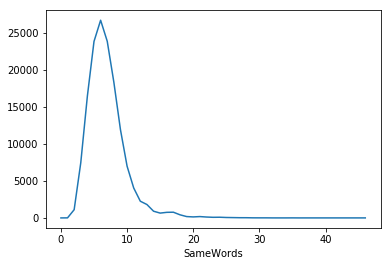

In [20]:
grouped.plot()

In [28]:

grouped2 = trainFile.groupby(['NoOfNouns'])['is_duplicate']
#[grouped2.sum(),grouped2.count()]

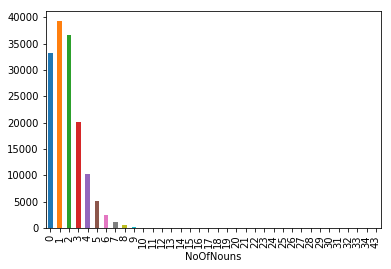

In [25]:
grouped2.sum().plot(kind="bar")

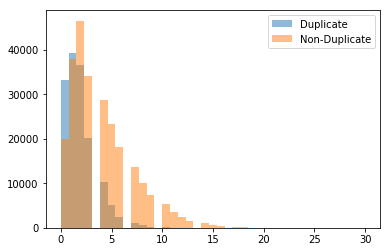

In [64]:
bins = np.linspace(0,30,40)
plt.hist(trainFile[trainFile["is_duplicate"] == 1]["NoOfNouns"],bins,alpha = 0.5,label = 'Duplicate')
plt.hist(trainFile[trainFile["is_duplicate"] == 0]["NoOfNouns"],bins,alpha = 0.5,label = 'Non-Duplicate')
plt.legend(loc='upper right')
plt.show()

In [290]:
X1=trainFile['cosineSimiliarity'].as_matrix()

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [291]:
X2=trainFile['NoOfNouns'].as_matrix()
X2.shape

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(404191,)

In [111]:
X3=trainFile['tk_set_ratio'].as_matrix()

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [112]:
X4=trainFile['ratio'].as_matrix()

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [114]:
X4.shape

(404191,)

In [144]:
X5 =trainFile["DiffLength"].as_matrix()

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [292]:
X = np.column_stack((X1,X2,X3,X4,X5))

In [146]:
X.shape

(404191, 5)

In [47]:
Y=trainFile['is_duplicate'].as_matrix()
Y.shape

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(404191,)

In [57]:
MNB = MultinomialNB()
MNB.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
Y_pred = MNB.predict(X)
accuracy=(np.mean(Y_pred==Y))
print(accuracy)

0.6483172559507757


In [150]:
LR = LogisticRegression()
LR.fit(X,Y)
Y_LR = LR.predict(X)
accuracyLR=(np.mean(Y_LR==Y))
print(accuracyLR)

0.6843645702155664


In [151]:
log_loss(Y, Y_LR, eps=1e-15)

10.901778900196826

In [67]:
#tokenizing with ngram
# comparing sentiment?
# LDA
# other people report

# Jaccard Coefficient

In [152]:
LR.coef_

array([[-3.47380364, -0.19949334,  0.05645917,  0.01939602, -0.00759666]])

In [153]:
LR.intercept_

array([-3.82583774])

In [293]:

rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf.fit(X,Y)
Y_rf = rf.predict(X)
accuracyRF = np.mean(Y==Y_rf)
accuracyRF

0.9500508422998039

In [294]:
log_loss(Y, Y_rf, eps=1e-15)

1.7252043223497793

In [163]:
log_loss(Y, Y_rf, eps=1e-15)

1.0657661403815757

In [118]:
log_loss(Y, Y_rf, eps=1e-15)

8.956038512372581

In [79]:
log_loss(Y, Y_rf, eps=1e-15)

10.303458792156462

In [109]:
confusion_matrix(Y, Y_rf)

array([[189462,  65469],
       [ 55106,  94154]], dtype=int64)

In [119]:
confusion_matrix(Y, Y_rf)

array([[199122,  55809],
       [ 48998, 100262]], dtype=int64)

In [124]:
confusion_matrix(Y, Y_rf)

array([[203147,  51784],
       [ 48564, 100696]], dtype=int64)

In [164]:
confusion_matrix(Y, Y_rf)

array([[248099,   6832],
       [  5640, 143620]], dtype=int64)

In [ ]:
FP >FN

In [295]:
GBD= GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=10)
GBD.fit(X,Y)
pred_GBD = GBD.predict(X)
np.mean(pred_GBD==Y)

0.6702499560851182

In [296]:
log_loss(Y, pred_GBD,eps=1e-15)

11.38917844961728

In [160]:
confusion_matrix(Y, pred_GBD)

array([[237738,  17193],
       [118387,  30873]], dtype=int64)

In [170]:
xg = xgboost.XGBClassifier()
xg.fit(X,Y)
Y_xg = xg.predict(X)
np.mean(Y_xg==Y)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7061438775232501

In [297]:
num_topics = 1 #The number of topics that should be generated
passes = 10
story ="DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty."
texts = [[word for word in story.lower().split()]]
#text = [word for word in story.lower().split()]
        
#corpus = corpus.replace("\\"," ")
#print(corpus)
dictionary   = corpora.Dictionary(texts)
#print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]
lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
           


In [305]:
num_topics = 1 #The number of topics that should be generated
passes = 10

def topic(lst):
    texts= [lst]
    dictionary   = corpora.Dictionary(texts)
    #print(dictionary)

    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
   
    topics=[x[0] for x in lda.show_topic(0,topn=5)]
    return topics
    

In [306]:
topic(['step', 'step', 'guid', 'invest', 'share', 'market', 'india', '?'])

['step', 'market', 'share', '?', 'india']

In [307]:
lda.show_topic(0,topn=5)

[('an', 0.06557377),
 ('in', 0.04918033),
 ('array', 0.04918033),
 ('is', 0.04918033),
 ('result', 0.032786883)]

In [39]:
differentWordsDiction ={}

def dictcount(lst, isdiff,differentWordsDiction):
    
      
    for word in lst:
        if word in differentWordsDiction:
            value0 = differentWordsDiction[word][0]
            value1 = differentWordsDiction[word][1]
            if isdiff:
                
                differentWordsDiction[word]=[value0,value1+1]
            else:     
                differentWordsDiction[word]=[value0+1,value1]
        else:
            if isdiff:
                
                differentWordsDiction[word]=[0,1]
            else:     
                differentWordsDiction[word]=[1,0]
            
            
    return  differentWordsDiction    

        
        
final=trainFile.apply(lambda x:dictcount( x['DifferentWordsStopped'], x['is_duplicate'],differentWordsDiction),axis=1)



In [40]:
zeroOneList = final[0]

In [41]:
len(zeroOneList)

63359

In [42]:
ls = []
for key,value in zeroOneList.items():
    ls.append((key,value[0],value[1]))

In [43]:
ls_sorted = sorted(ls,key=lambda x: -x[1] - x[2])

In [62]:
new_ls=[]

for x in ls:
    if (abs(x[1]-x[2])>300):
        if (x[1]/x[2] >7 or x[2]/x[1]>7):
            new_ls.append(x)

In [63]:
len(new_ls)

240

In [64]:
new_ls_sorted = sorted(new_ls,key=lambda x: abs(x[1] - x[2]), reverse=True)
#new_ls_sorted

In [65]:
#[x for x in new_ls_sorted if x[0]=='again']

[x for x in ls if x[0]=='again']

[('again', 924, 189)]

In [66]:
new_ls_sorted

[('1', 3538, 463),
 ('compani', 3277, 441),
 ('friend', 2365, 319),
 ('love', 2255, 314),
 ('6', 1762, 224),
 ('pay', 1465, 148),
 ('appli', 1505, 204),
 ('7', 1465, 171),
 ('run', 1496, 204),
 ('cost', 1395, 130),
 ('+', 1344, 92),
 ('b', 1404, 184),
 ('data', 1395, 178),
 ('etc', 1316, 113),
 ('bank', 1317, 142),
 ('android', 1329, 156),
 ('car', 1310, 143),
 ('averag', 1273, 153),
 ('8', 1304, 186),
 ('facebook', 1226, 120),
 ('china', 1252, 172),
 ('normal', 1188, 153),
 ('%', 1104, 87),
 ('set', 1145, 152),
 ('$', 1121, 133),
 ('card', 1045, 59),
 ('famili', 1103, 127),
 ('parent', 1045, 98),
 ('water', 1084, 145),
 ('2015', 1000, 68),
 ('delhi', 989, 76),
 ('train', 1021, 129),
 ('connect', 954, 79),
 ('download', 965, 95),
 ('leav', 1013, 143),
 ('project', 992, 135),
 ('file', 924, 69),
 ('score', 982, 131),
 ('song', 923, 75),
 ('math', 943, 98),
 ('marri', 905, 60),
 ('0', 926, 83),
 ('mechan', 935, 94),
 ('sell', 927, 91),
 ('salari', 916, 82),
 ('social', 952, 118),
 ('save

In [ ]:
#words making sense , will not lead to overfitting
again, enough,hour,small,full, accept, worth,like, use, differ, between, much, without, student, live, countri, name, long,show
relationship, join, hard,connect, %, $, size,, =

In [67]:
def word_check(ls,word):
    if word in ls:
        return 1
    else:
        return 0

In [70]:
trainFile['is_again'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'again'),axis = 1)

In [72]:
trainFile['is_differ'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'differ'),axis = 1)

In [73]:
trainFile['is_without'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'without'),axis = 1)

In [74]:
trainFile['is_between'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'between'),axis = 1)

In [75]:
trainFile['is_percentage'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'%'),axis = 1)

In [76]:
trainFile['is_dollar'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'$'),axis = 1)

In [77]:
trainFile['is_name'] = trainFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'name'),axis = 1)

In [78]:
trainFile.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed,...,ratio,DiffLength,DifferentWordsStopped,is_again,is_differ,is_without,is_between,is_percentage,is_dollar,is_name
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, is, the, step, by, step, guide, to, invest, in, share, market, in, india, ?]","[what, is, the, step, by, step, guide, to, invest, in, share, market, ?]","[step, step, guid, invest, share, market, india, ?]","[step, step, guid, invest, share, market, ?]",...,93,9,[india],0,0,0,0,0,0,0


In [79]:
trainFile.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'Q1Words', 'Q2Words', 'Q1WordsStemmed', 'Q2WordsStemmed', 'SameWords',
       'DifferentWords', 'cosineSimiliarity', 'POS', 'PartOfSpeech',
       'NoOfNouns', 'tk_set_ratio', 'ratio', 'DiffLength',
       'DifferentWordsStopped', 'is_again', 'is_differ', 'is_without',
       'is_between', 'is_percentage', 'is_dollar', 'is_name'],
      dtype='object')

In [80]:
X= trainFile.as_matrix(columns =['ratio','DiffLength','cosineSimiliarity','NoOfNouns', 'tk_set_ratio','is_again', 'is_differ', 'is_without',
       'is_between', 'is_percentage', 'is_dollar', 'is_name'])

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [122]:
X.shape

(404191, 12)

In [123]:
Y=trainFile['is_duplicate'].as_matrix()
Y.shape

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(404191,)

In [125]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [127]:

rf = RandomForestClassifier(n_estimators = 30, random_state = 0)
rf.fit(X_train,y_train)
Y_rf = rf.predict(X_train)
accuracyRF = np.mean(y_train==Y_rf)
accuracyRF

0.9719624434053292

In [128]:
Y_rf2 = rf.predict(X_test)
accuracyRF2 = np.mean(y_test==Y_rf2)
accuracyRF2

0.6942564851123839

In [130]:
log_loss(y_test, Y_rf2, eps=1e-15)

10.560117468997447

In [131]:
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)
Y_xg = xg.predict(X_train)
np.mean(Y_xg==y_train)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7066787896781217

In [132]:
Y_xg2 = xg.predict(X_test)
np.mean(Y_xg2==y_test)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7048330632491743

In [ ]:
from sklearn import svm
model=svm.SVC(C=100000000,kernel="linear") 
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
np.mean(train_pred==y_train)

In [ ]:
test_pred = model.predict(X_test)
np.mean(test_pred==y_test)

In [233]:
diction = {'a':[1,2],'b':[3,2]}
diction['a']

diction['a'] = [1,3]
#if key in diction:
diction['a']  

[1, 3]

In [212]:
[1,3][1,2]

[1, 3, 1, 2]

In [264]:
trainFile[trainFile.apply(lambda x: 'again' in x['DifferentWords'],axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate,Q1Words,Q2Words,SameWords,DifferentWords,cosineSimiliarity,POS,PartOfSpeech,NoOfNouns,tk_set_ratio,ratio,DiffLength
420,420,838,839,How can I start trusting any one?,How can one learn to trust again?,0,"[how, can, i, start, trusting, any, one, ?]","[how, can, one, learn, to, trust, again, ?]","[one, can, ?, how]","[trusting, learn, start, to, i, again, trust, any]",0.333333,"[(trusting, VBG), (learn, JJ), (start, NN), (to, TO), (i, VB), (again, RB), (trust, NN), (any, DT)]","[VBG, JJ, NN, TO, VB, RB, NN, DT]",2,75,64,0
568,568,1134,1135,How do I start writing again?,How do I start writing?,0,"[how, do, i, start, writing, again, ?]","[how, do, i, start, writing, ?]","[start, i, ?, writing, do, how]",[again],0.857143,"[(again, RB)]",[RB],0,100,88,6
695,695,1387,1388,Do I need to get a tetanus shot again?,Do I need to get a tetanus shot?,0,"[do, i, need, to, get, a, tetanus, shot, again, ?]","[do, i, need, to, get, a, tetanus, shot, ?]","[get, to, ?, tetanus, a, need, do, i, shot]",[again],0.900000,"[(again, RB)]",[RB],0,100,91,6
1602,1602,3190,3191,Is there any way to recover registration number of ICAI?,"I flunked CPT june 2016, but I want to give it again in december . Do I need to register again?",0,"[is, there, any, way, to, recover, registration, number, of, icai, ?]","[i, flunked, cpt, june, 2016, ,, but, i, want, to, give, it, again, in, december, ., do, i, need, to, register, again, ?]","[to, ?]","[way, ,, is, icai, of, but, i, flunked, recover, again, ., register, there, 2016, registration, want, number, need, do, any, december, in, it, cpt, give, june]",0.071429,"[(way, NN), (,, ,), (is, VBZ), (icai, JJ), (of, IN), (but, CC), (i, JJ), (flunked, VBD), (recover, RB), (again, RB), (., .), (register, NN), (there, RB), (2016, CD), (registration, NN), (want, VBP), (number, NN), (need, MD), (do, VB), (any, DT), (december, VB), (in, IN), (it, PRP), (cpt, VBZ), (give, JJ), (june, NN)]","[NN, ,, VBZ, JJ, IN, CC, JJ, VBD, RB, RB, ., NN, RB, CD, NN, VBP, NN, MD, VB, DT, VB, IN, PRP, VBZ, JJ, NN]",5,45,36,39
2014,2014,4007,4008,Is it cruel to dismantle your boyfriends lego and withhold one vital piece so it can never be whole again?,My mother in law has no interest in my kids and never made effort to get to know them but sends me cruel emails.Why? I've not done anything to her.,0,"[is, it, cruel, to, dismantle, your, boyfriends, lego, and, withhold, one, vital, piece, so, it, can, never, be, whole, again, ?]","[my, mother, in, law, has, no, interest, in, my, kids, and, never, made, effort, to, get, to, know, them, but, sends, me, cruel, emails, ., why, ?, i, ', ve, not, done, anything, to, her, .]","[never, to, ?, cruel, and]","[withhold, know, is, get, boyfriends, one, but, not, lego, can, has, whole, her, i, effort, done, sends, made, again, dismantle, kids, them, ., mother, piece, no, be, me, emails, ', ve, your, law, in, why, interest, it, anything, vital, so, my]",0.108696,"[(withhold, NN), (know, NN), (is, VBZ), (get, VB), (boyfriends, JJ), (one, CD), (but, CC), (not, RB), (lego, JJ), (can, MD), (has, VBZ), (whole, VB), (her, PRP$), (i, NN), (effort, NN), (done, VBN), (sends, NNS), (made, VBN), (again, RB), (dismantle, JJ), (kids, NNS), (them, PRP), (., .), (mother, CC), (piece, JJ), (no, DT), (be, VB), (me, PRP), (emails, JJ), (', ''), (ve, FW), (your, PRP$), (law, NN), (in, IN), (why, WRB), (interest, NN), (it, PRP), (anything, NN), (vital, JJ), (so, IN), (my, PRP$)]","[NN, NN, VBZ, VB, JJ, CD, CC, RB, JJ, MD, VBZ, VB, PRP$, NN, NN, VBN, NNS, VBN, RB, JJ, NNS, PRP, ., CC, JJ, DT, VB, PRP, JJ, '', FW, PRP$, NN, IN, WRB, NN, PRP, NN, JJ, IN, PRP$]",9,35,19,41
2533,2533,5033,5034,Did the Airbus A320 from US Airways Flight 1549 (which ditched in the Hudson River) ever fly again?,Why does US Airways flight 1549 get so much attention when ALM Flight 980 made a successful water landing in the open ocean?,0,"[did, the, airbus, a320, from, us, airways, flight, 1549, (, which, ditched, i

In [ ]:
a ="abc"
a.

In [255]:
trainFile.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'Q1Words', 'Q2Words', 'SameWords', 'DifferentWords',
       'cosineSimiliarity', 'POS', 'PartOfSpeech', 'NoOfNouns', 'tk_set_ratio',
       'ratio', 'DiffLength'],
      dtype='object')

In [329]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


AssertionError: 

In [92]:
testFile = pd.read_csv(os.getcwd()+"\\test.csvfile\\test.csv")

C:\Users\ankur\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
#testFile = pd.read_csv(os.getcwd()+"\\test.csv")

testFile= testFile[testFile['question1'].map(str).apply(len)>8]

testFile =testFile[testFile['question2'].map(str).apply(len)>=10]


tempDF= testFile['question1'].apply(lambda x: str(x).lower())
testFile['Q1Words']= tempDF.apply(WordPunctTokenizer().tokenize)

tempDF= testFile['question2'].apply(lambda x: str(x).lower())
testFile['Q2Words']= tempDF.apply(WordPunctTokenizer().tokenize)



,test_id,question1,question2,Q1Words,Q2Words
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,"[how, does, the, surface, pro, himself, 4, compare, with, ipad, pro, ?]","[why, did, microsoft, choose, core, m3, and, not, core, i3, home, surface, pro, 4, ?]"
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?,"[should, i, have, a, hair, transplant, at, age, 24, ?, how, much, would, it, cost, ?]","[how, much, cost, does, hair, transplant, require, ?]"
2,2,What but is the best way to send money from China to the US?,What you send money to China?,"[what, but, is, the, best, way, to, send, money, from, china, to, the, us, ?]","[what, you, send, money, to, china, ?]"
3,3,Which food not emulsifiers?,What foods fibre?,"[which, food, not, emulsifiers, ?]","[what, foods, fibre, ?]"
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?,"[how, "", aberystwyth, "", start, reading, ?]","[how, their, can, i, start, reading, ?]"


In [ ]:
testFile['Q1WordsStemmed'] = testFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q1Words'] if i not in stops ],axis=1 )

testFile['Q2WordsStemmed'] = testFile.apply(lambda x:[p_stemmer.stem(i) for i in x['Q2Words'] if i not in stops ],axis=1 )

testFile['SameWords'] = testFile.apply(lambda row:intersection(row['Q1Words'],row['Q2Words']) , axis=1)

testFile['DifferentWords'] = testFile.apply(lambda row:differ(union(row['Q1Words'],row['Q2Words']),intersection(row['Q1Words'],row['Q2Words'])) , axis=1)
testFile['DifferentWordsStopped'] = testFile.apply(lambda row:differ(union(row['Q1WordsStemmed'],row['Q2WordsStemmed']),intersection(row['Q1WordsStemmed'],row['Q2WordsStemmed'])) , axis=1)

In [96]:
testFile['cosineSimiliarity'] = testFile.apply(lambda row:len(row['SameWords'])/(len(union(row['Q1Words'],row['Q2Words']))) ,axis=1)

In [98]:
testFile.head(1)

,test_id,question1,question2,Q1Words,Q2Words,Q1WordsStemmed,Q2WordsStemmed,SameWords,DifferentWords,DifferentWordsStopped,cosineSimiliarity
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?,"[how, does, the, surface, pro, himself, 4, compare, with, ipad, pro, ?]","[why, did, microsoft, choose, core, m3, and, not, core, i3, home, surface, pro, 4, ?]","[surfac, pro, 4, compar, ipad, pro, ?]","[microsoft, choos, core, m3, core, i3, home, surfac, pro, 4, ?]","[surface, ?, 4, pro]","[and, how, ipad, compare, with, did, microsoft, does, m3, i3, himself, the, home, not, choose, core, why]","[ipad, core, m3, choos, i3, compar, home, microsoft]",0.190476


In [113]:
testFile['POS'] = testFile['DifferentWords'].apply(nltk.pos_tag)

MemoryError: 

In [108]:


#testFile['PartOfSpeech'] = testFile['POS'].map('list').apply() if len(z)>1]
testFile['PartOfSpeech'] = testFile.apply(lambda x: [y[1] for y in x["POS"]],axis = 1)

KeyError: ('POS', 'occurred at index 0')

In [ ]:
testFile['NoOfNouns'] = testFile.apply(lambda x: count(x['PartOfSpeech']) ,axis = 1)

In [100]:
testFile["tk_set_ratio"] = testFile.apply(lambda x: fuzz.token_set_ratio(str(x["question1"]),str(x["question2"])),axis = 1)

testFile["ratio"] = testFile.apply(lambda x: fuzz.ratio(str(x["question1"]),str(x["question2"])),axis = 1)


In [101]:

testFile["DiffLength"] = testFile.apply(lambda x: abs(len(x["question1"])-len(x["question2"])), axis = 1)

In [103]:
testFile['is_again'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'again'),axis = 1)

testFile['is_differ'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'differ'),axis = 1)

testFile['is_without'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'without'),axis = 1)


testFile['is_between'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'between'),axis = 1)

testFile['is_percentage'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'%'),axis = 1)


testFile['is_dollar'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'$'),axis = 1)

testFile['is_name'] = testFile.apply(lambda x: word_check(x['DifferentWordsStopped'],'name'),axis = 1)

#testFile.head(1)

MemoryError: occurred at index 2817124

In [114]:
HalftestFile = pd.read_csv(os.getcwd()+"\\test.csvfile\\test.csv", nrows=50000)

In [120]:
HalftestFile.columns
HalftestFile.head(3)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?


In [115]:
HalftestFile[HalftestFile['']]

(50000, 3)

In [ ]:
X_test= testFile.as_matrix(columns =['ratio','DiffLength','cosineSimiliarity','NoOfNouns', 'tk_set_ratio','is_again', 'is_differ', 'is_without',
       'is_between', 'is_percentage', 'is_dollar', 'is_name'])


X_test.shape

In [ ]:
Y_test=testFile['is_duplicate'].as_matrix()
Y_test.shape

In [ ]:
Y_test_pred = rf.predict(X_test)
accuracyRF = np.mean(Y_test==Y_test_pred)
accuracyRF